<a href="https://colab.research.google.com/github/monicasjsu/deep_learning/blob/master/lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folders = ['bikes','cycles','cars']
path = Path('drive/My Drive/Datasets')

In [0]:
for folder in folders:
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[PosixPath('drive/My Drive/Datasets/HR_Employee_Attrition.csv'),
 PosixPath('drive/My Drive/Datasets/bikes.csv'),
 PosixPath('drive/My Drive/Datasets/cars.csv'),
 PosixPath('drive/My Drive/Datasets/cycles.csv'),
 PosixPath('drive/My Drive/Datasets/cars'),
 PosixPath('drive/My Drive/Datasets/.ipynb_checkpoints'),
 PosixPath('drive/My Drive/Datasets/bikes'),
 PosixPath('drive/My Drive/Datasets/cycles'),
 PosixPath('drive/My Drive/Datasets/models'),
 PosixPath('drive/My Drive/Datasets/cleaned.csv')]

In [0]:
files = ['bikes.csv','cycles.csv','cars.csv']

In [10]:
for file, folder in zip(files, folders):
  download_images(path/file, path/folder, max_pics=20, max_workers=0)

In [20]:
for folder in folders:
  print(folder)
  verify_images(path/folder, delete=True, max_size=500)

bikes


cycles


cars


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['bikes', 'cars', 'cycles']

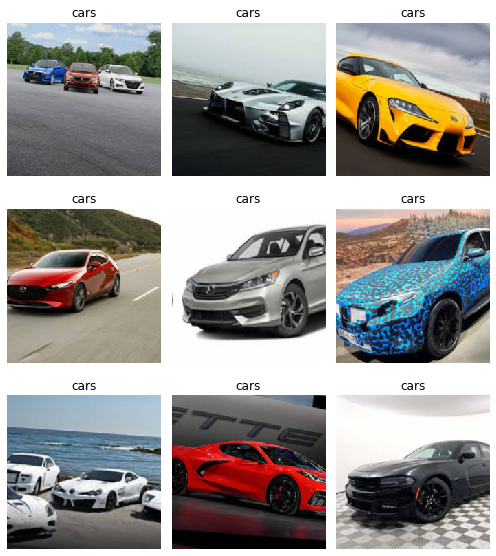

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bikes', 'cars', 'cycles'], 3, 176, 44)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [18]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.810223,4.828278,0.818182,00:03
1,1.483984,0.371576,0.068182,00:02
2,1.272611,0.110195,0.022727,00:02
3,1.112760,0.097311,0.022727,00:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [0]:
learn.export()

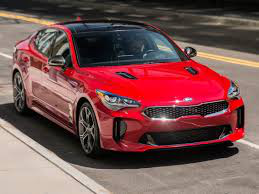

In [22]:
img = open_image(path/'cars'/'00000143.jpg')
img

In [0]:
learn = load_learner(path)

In [24]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category cars

In [0]:
# It correctly predicted the category of the vehicle